In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')
original_df=df.copy()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
name_cols=df.select_dtypes(include='number').copy()

name_cols

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [4]:
name_cols=df.select_dtypes(include='number').copy()

name_cols

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [5]:
name_cols.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [6]:
name_cols.fillna(name_cols.mean(),inplace=True)

name_cols

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


In [12]:
scaled_age = scaler.fit_transform(name_cols[['Age']])
scaled_age_df = pd.DataFrame(scaled_age, columns=['Age'])
scaled_age_df.sample(10)


,Age
80,-0.592481
873,1.331378
653,0.000000
504,-1.054207
178,0.023154
682,-0.746389
669,0.000000
832,0.000000
768,0.000000
108,0.638789


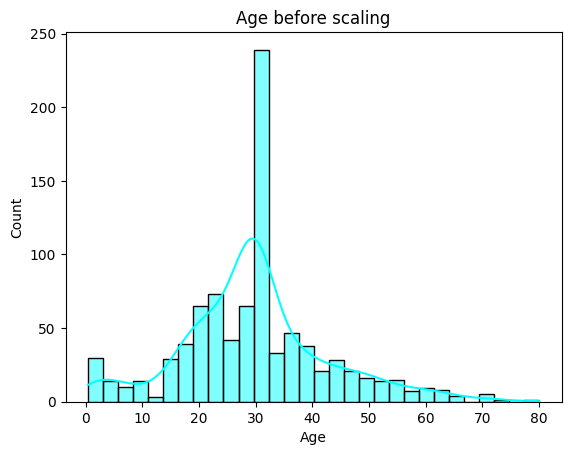

In [ ]:
sns.histplot(name_cols['Age'],kde=True,color='cyan')
plt.title('Age before scaling')
plt.show()

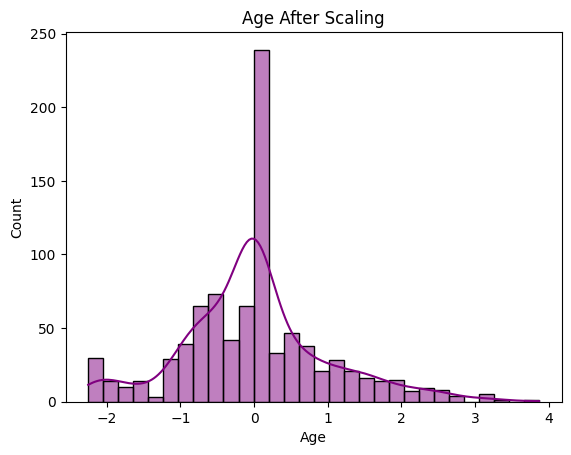

In [ ]:
sns.histplot(scaled_age_df['Age'],kde=True,color='purple')
plt.title('Age After Scaling')
plt.show()

In [ ]:
name_cols['Age'].mean()

np.float64(29.69911764705882)

In [ ]:
scaled_age_df['Age'].mean()

np.float64(2.2329064647904385e-16)

In [ ]:
name_cols['Age'].std()

np.float64(13.002015226002882)

In [ ]:
scaled_age_df['Age'].std()

np.float64(1.0005616400330457)

In [13]:
Q1=name_cols['Age'].quantile(0.25)
Q3=name_cols['Age'].quantile(0.75)

IQR=Q3-Q1

IQR

np.float64(13.0)

In [14]:

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

upper_bound

np.float64(54.5)

In [15]:
age_clean=name_cols[(name_cols['Age']>=lower_bound)& (name_cols['Age']<=upper_bound)]

age_clean

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


In [16]:
from sklearn.preprocessing import StandardScaler



#Initialize standardScaler
scaler=StandardScaler()

#Fix and Transform
scaled_data=scaler.fit_transform(age_clean)

scaled_df=pd.DataFrame(scaled_data,columns=age_clean.columns)
scaled_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,-1.737300,-0.783889,0.799155,-0.676034,0.451484,-0.448025,-0.485389
1,-1.733408,1.275691,-1.629217,0.896210,0.451484,-0.448025,0.797171
2,-1.729516,1.275691,0.799155,-0.282973,-0.465940,-0.448025,-0.471869
3,-1.725624,1.275691,-1.629217,0.601414,0.451484,-0.448025,0.432967
4,-1.721732,-0.783889,0.799155,0.601414,-0.465940,-0.448025,-0.469366
...,...,...,...,...,...,...,...
820,1.711070,-0.783889,-0.415031,-0.184708,-0.465940,-0.448025,-0.370219
821,1.714962,1.275691,-1.629217,-0.970830,-0.465940,-0.448025,-0.029716
822,1.718854,-0.783889,0.799155,0.080521,0.451484,2.057878,-0.160910
823,1.722746,1.275691,-1.629217,-0.282973,-0.465940,-0.448025,-0.029716


In [17]:
scaled_df['Age'].mean()

np.float64(4.7369515717340015e-17)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Apply min-max normalization

scaler=MinMaxScaler()

normalized_data=scaler.fit_transform(name_cols)

normalized_df=pd.DataFrame(normalized_data,columns=name_cols.columns)

normalized_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.000000,0.0,1.0,0.271174,0.125,0.0,0.014151
1,0.001124,1.0,0.0,0.472229,0.125,0.0,0.139136
2,0.002247,1.0,1.0,0.321438,0.000,0.0,0.015469
3,0.003371,1.0,0.0,0.434531,0.125,0.0,0.103644
4,0.004494,0.0,1.0,0.434531,0.000,0.0,0.015713


In [ ]:
from sklearn.preprocessing import Binarizer

df_age=df[['Age']].dropna().copy()

binarize=Binarizer(threshold=18)
binary_age=binarize.fit_transform(df_age)

df_age['age_binary']=binary_age

df_age

,Age,age_binary
0,22.0,1.0
1,38.0,1.0
2,26.0,1.0
3,35.0,1.0
4,35.0,1.0
...,...,...
885,39.0,1.0
886,27.0,1.0
887,19.0,1.0
889,26.0,1.0


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
scaled_data=scaler.fit_transform(name_cols)

scaled_df=pd.DataFrame(scaled_data,columns=name_cols.columns)

print('Before scaling')
print(name_cols['Fare'].describe())

print('After Scaling')
print(scaled_df['Fare'].describe())

Before scaling
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
After Scaling
count    891.000000
mean       0.768745
std        2.152200
min       -0.626005
25%       -0.283409
50%        0.000000
75%        0.716591
max       21.562738
Name: Fare, dtype: float64
